In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [261]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

a = a * 0.55
b = b * 0.94
tau = tau * 19.46
k = k * 0.57

In [262]:
size = 100
dx = 2./size
T = 49.0
dt = .001
n = int(T/dt)

In [263]:
U = np.random.rand(size,size)
V = np.random.rand(size,size)

In [264]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper, interpolation='bilinear', extent=[-1,1,-1,1])
    ax.set_axis_off()

In [265]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

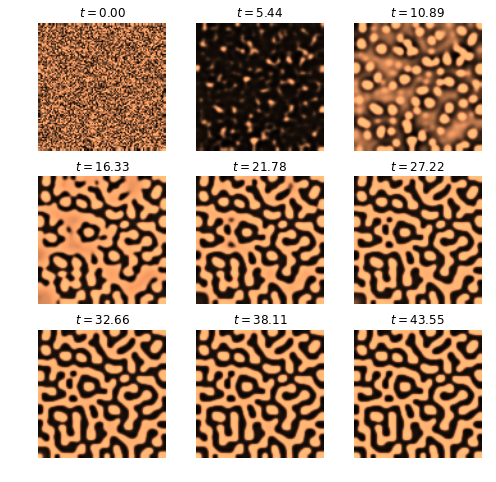

In [266]:
fig, axes = plt.subplots(3,3,figsize=(8,8))
step_plot = n // 9
for i in range(n):
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    for Z in (U,V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]        
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')        

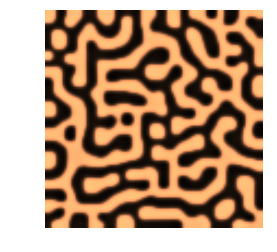

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
show_patterns(U, ax=ax)